In [229]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [230]:
import seaborn as sns

In [231]:
data_train = pd.read_csv('train_sales_predict.csv')

In [232]:
data_train.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,560,NaN,2,59,3,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,4510000
1,1,2011-1,667,NaN,10,50,2,1,25.0,NaN,...,0,0,0,0,0,0,0,0,0,13231000
2,2,2011-1,90,0.0,1,48,2,0,25.0,0.0,...,0,0,0,0,0,0,0,0,0,2008000
3,3,2011-1,94,1.0,3,62,3,1,30.0,NaN,...,0,0,0,0,0,0,0,0,0,12680000
4,4,2011-1,232,0.0,3,60,3,0,25.0,NaN,...,0,0,0,0,0,0,0,0,0,3335000


In [233]:
del data_train['id']

In [234]:
data_train.shape

(100000, 24)

In [235]:
data_train.head()

,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,2011-1,560,NaN,2,59,3,0,30.0,1.0,5,...,0,0,0,0,0,0,0,0,0,4510000
1,2011-1,667,NaN,10,50,2,1,25.0,NaN,1,...,0,0,0,0,0,0,0,0,0,13231000
2,2011-1,90,0.0,1,48,2,0,25.0,0.0,1,...,0,0,0,0,0,0,0,0,0,2008000
3,2011-1,94,1.0,3,62,3,1,30.0,NaN,3,...,0,0,0,0,0,0,0,0,0,12680000
4,2011-1,232,0.0,3,60,3,0,25.0,NaN,3,...,0,0,0,0,0,0,0,0,0,3335000


In [236]:
data_train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        100000 non-null  object 
 1   street_id   100000 non-null  int64  
 2   build_tech  70265 non-null   float64
 3   floor       100000 non-null  int64  
 4   area        100000 non-null  int64  
 5   rooms       100000 non-null  int64  
 6   balcon      100000 non-null  int64  
 7   metro_dist  95104 non-null   float64
 8   g_lift      70008 non-null   float64
 9   n_photos    100000 non-null  int64  
 10  kw1         100000 non-null  int64  
 11  kw2         100000 non-null  int64  
 12  kw3         100000 non-null  int64  
 13  kw4         100000 non-null  int64  
 14  kw5         100000 non-null  int64  
 15  kw6         100000 non-null  int64  
 16  kw7         100000 non-null  int64  
 17  kw8         100000 non-null  int64  
 18  kw9         100000 non-null  int64  
 19  kw1

In [237]:
data_train.isna().sum()

date              0
street_id         0
build_tech    29735
floor             0
area              0
rooms             0
balcon            0
metro_dist     4896
g_lift        29992
n_photos          0
kw1               0
kw2               0
kw3               0
kw4               0
kw5               0
kw6               0
kw7               0
kw8               0
kw9               0
kw10              0
kw11              0
kw12              0
kw13              0
price             0
dtype: int64

In [238]:
del data_train['g_lift']
del data_train['build_tech']

In [239]:
data_train['metro_dist'].unique()

array([30., 25., 20., 15., 10., nan,  0.,  5.])

In [240]:
data_train['metro_dist'].median(), data_train['metro_dist'].mean(), data_train['metro_dist'].mode()

(25.0,
 22.154430938761777,
 0    30.0
 Name: metro_dist, dtype: float64)

C:\Users\79252\AppData\Local\Temp\ipykernel_21816\2218872790.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


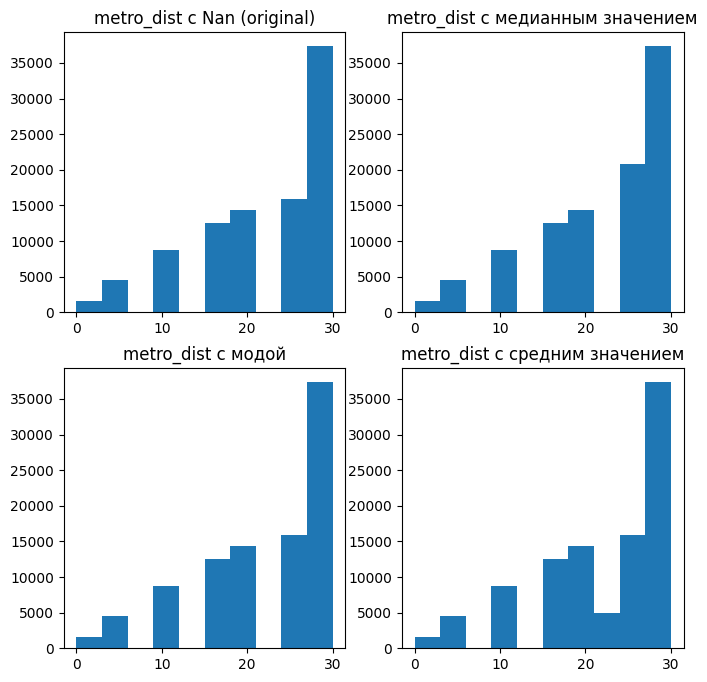

In [241]:
metro_dist_median = data_train['metro_dist'].fillna(data_train['metro_dist'].median())
metro_dist_mean = data_train['metro_dist'].fillna(data_train['metro_dist'].mean())
metro_dist_mode = data_train['metro_dist'].fillna(data_train['metro_dist'].mode())


fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (8,8))


ax[0,0].hist(data_train['metro_dist'] )
ax[0,0].set_title('metro_dist с Nan (original)')

ax[0,1].hist(metro_dist_median)
ax[0,1].set_title('metro_dist с медианным значением')

ax[1,1].hist(metro_dist_mean )
ax[1,1].set_title('metro_dist с средним значением')

ax[1,0].hist(metro_dist_mode)
ax[1,0].set_title('metro_dist с модой')
fig.show()


в данном случае распределение почти не меняется, если заполнять пропуски мединаой, так что оставляем ее. Мода - это как раз пропуски, так что ее поставить мы не можем

In [242]:
data_train['metro_dist'] = data_train['metro_dist'].fillna(data_train['metro_dist'].median())


In [243]:
data_train.isna().sum()

date          0
street_id     0
floor         0
area          0
rooms         0
balcon        0
metro_dist    0
n_photos      0
kw1           0
kw2           0
kw3           0
kw4           0
kw5           0
kw6           0
kw7           0
kw8           0
kw9           0
kw10          0
kw11          0
kw12          0
kw13          0
price         0
dtype: int64

теперь все колонки без пропущенных значений

In [244]:
for col in data_train.columns:
    print(col, data_train[f'{col}'].value_counts().shape[0])

date 18
street_id 672
floor 25
area 115
rooms 6
balcon 3
metro_dist 7
n_photos 12
kw1 2
kw2 2
kw3 2
kw4 2
kw5 2
kw6 2
kw7 2
kw8 2
kw9 2
kw10 2
kw11 2
kw12 2
kw13 2
price 15007


C:\Users\79252\AppData\Local\Temp\ipykernel_21816\3072162055.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_train.corr())


''

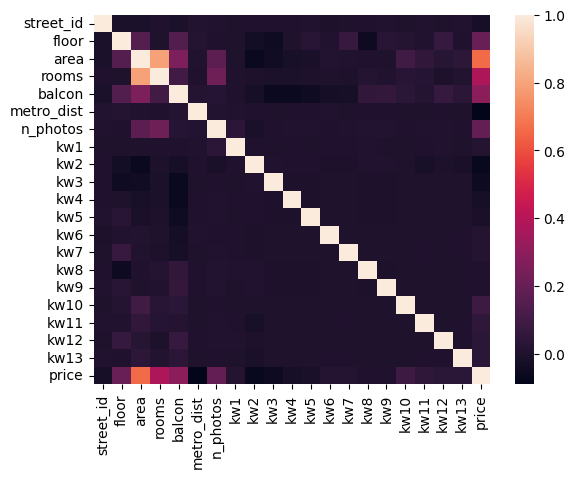

In [245]:
sns.heatmap(data_train.corr())
;

не будем кодировать rooms и floor, оставим порядок таким, какой он был, по возрастанию

In [246]:
cat_cols_to_OHE = ['date' ,'balcon','n_photos','metro_dist'] #можно закодировать one_hot_encoding
cat_cols_many_values = ['street_id','area'] #слишком много колонок получится при ohe, будем пробовать другие методы
cat_cols_to_label_encoding = ['floor', 'rooms']

In [247]:
data_train = pd.get_dummies(data_train , columns= cat_cols_to_OHE)

In [248]:
data_train.head()

,street_id,floor,area,rooms,kw1,kw2,kw3,kw4,kw5,kw6,...,n_photos_9,n_photos_10,n_photos_11,metro_dist_0.0,metro_dist_5.0,metro_dist_10.0,metro_dist_15.0,metro_dist_20.0,metro_dist_25.0,metro_dist_30.0
0,560,2,59,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,667,10,50,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,90,1,48,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,94,3,62,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,232,3,60,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [249]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler